In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("train_v9rqX0R.csv")

test = pd.read_csv("test_AbJTz2l.csv")


train = train.copy()
test = test.copy()

train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Item_Weight and Outlet_Size are missing in both train and test. it must  be imputed before modeling

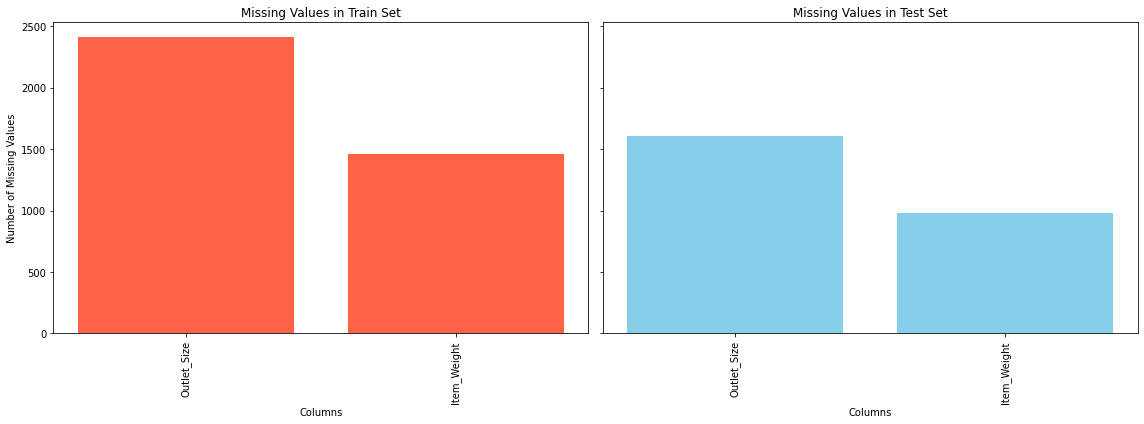

In [4]:

missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Train
axes[0].bar(missing_train.index, missing_train.values, color='tomato')
axes[0].set_title('Missing Values in Train Set')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Number of Missing Values')
axes[0].tick_params(axis='x', rotation=90)

# Test
axes[1].bar(missing_test.index, missing_test.values, color='skyblue')
axes[1].set_title('Missing Values in Test Set')
axes[1].set_xlabel('Columns')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


## Distribution is right-skewed (long tail): Most items sell below ₹4000, few go beyond ₹10,000.

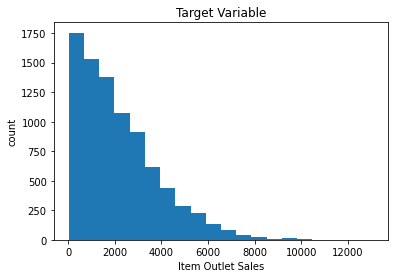

In [5]:
plt.hist(train['Item_Outlet_Sales'], bins = 20)
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

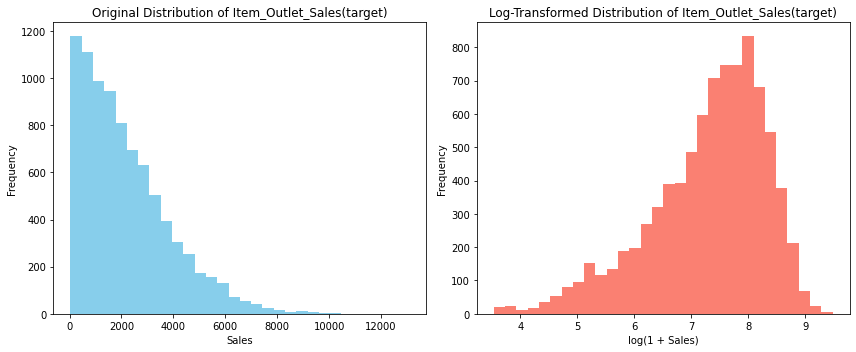

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.hist(train['Item_Outlet_Sales'], bins=30, color='skyblue')
plt.title('Original Distribution of Item_Outlet_Sales(target)')
plt.xlabel('Sales')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['Item_Outlet_Sales']), bins=30, color='salmon')
plt.title('Log-Transformed Distribution of Item_Outlet_Sales(target)')
plt.xlabel('log(1 + Sales)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Histogram and frequency chart shows uniform representation for Item_Identifier.(Very little variation as most items occur with similar frequency.)

## It Might indicate product diversity is balanced in data

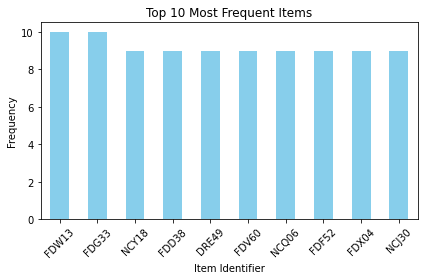

In [7]:
top_items = train['Item_Identifier'].value_counts().head(10)

top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Items')
plt.xlabel('Item Identifier')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


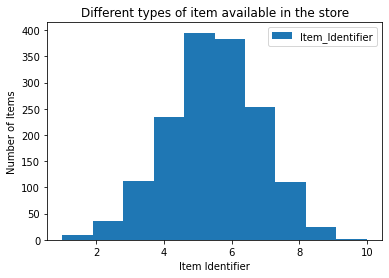

In [8]:
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

## Duplicate categories (LF, low fat, reg etc.). it must be cleaned into 'Low Fat' and 'Regular'

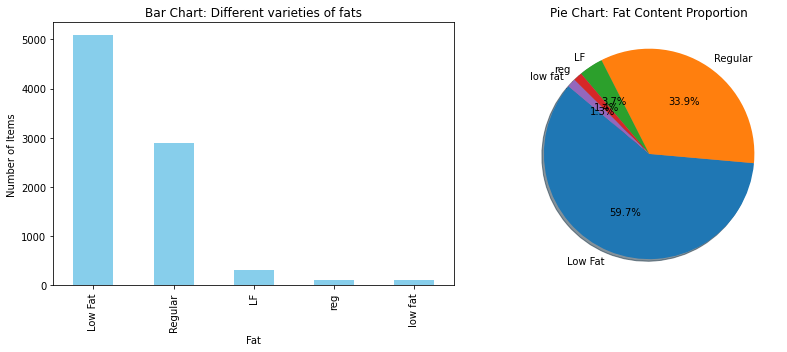

In [9]:
fat_counts = train['Item_Fat_Content'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
fat_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart: Different varieties of fats')
plt.xlabel('Fat')
plt.ylabel('Number of Items')


plt.subplot(1, 2, 2)
fat_counts.plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Pie Chart: Fat Content Proportion')
plt.ylabel('')  

plt.tight_layout()
plt.show()


## Fruits and Vegetables, Snack Foods, and Household items are most frequent.These could indicate high-demand categories and affect sales patterns.



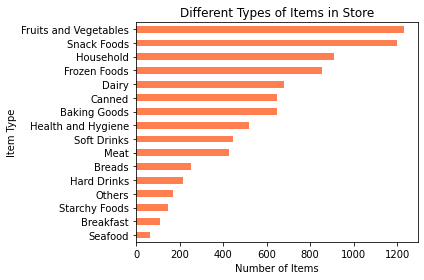

In [10]:
item_type_counts = train['Item_Type'].value_counts()


item_type_counts.sort_values(ascending=True).plot(kind='barh', color='coral')
plt.title('Different Types of Items in Store')
plt.xlabel('Number of Items')
plt.ylabel('Item Type')
plt.tight_layout()
plt.show()


## Consistent item count across most outlets, except OUT017 and OUT019 (lower counts)

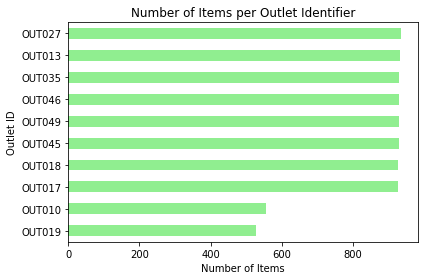

In [11]:
train['Outlet_Identifier'].value_counts().sort_values().plot(kind='barh', color='lightgreen')
plt.title('Number of Items per Outlet Identifier')
plt.xlabel('Number of Items')
plt.ylabel('Outlet ID')
plt.tight_layout()
plt.show()


## Outlet_Size: Many are Medium or Small and some missing.

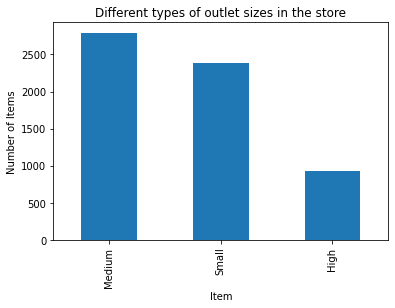

In [12]:
train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [13]:
print("no of missing outlets",train['Outlet_Size'].isnull().sum())

no of missing outlets 2410


In [14]:
missing_outlets = train[train['Outlet_Size'].isnull()]['Outlet_Identifier'].unique()
print(missing_outlets)

['OUT010' 'OUT045' 'OUT017']


In [15]:
train[train['Outlet_Identifier'].isin(missing_outlets)][['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type']].drop_duplicates()

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type
3,OUT010,Grocery Store,Tier 3
8,OUT045,Supermarket Type1,Tier 2
9,OUT017,Supermarket Type1,Tier 2


## out of three ids missing, OUT010 is a Grocery Store in Tier 3 and OUT045 and OUT017 are both Supermarket Type1 in Tier 2

## OUT045, OUT017: Supermarket Type1 + Tier 2 :Impute as Small (matches mode).
## OUT010: Grocery Store + Tier 3:  Not in summary, but Grocery Store mode is Small. so we can, Impute as Small.

In [16]:
ref_outlets = train[train['Outlet_Size'].notnull()]

group_summary = (
    ref_outlets
    .groupby(['Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size']
    .agg(lambda x: x.mode().iloc[0])
    .reset_index()
)

group_summary

,Outlet_Type,Outlet_Location_Type,Outlet_Size
0,Grocery Store,Tier 1,Small
1,Supermarket Type1,Tier 1,Medium
2,Supermarket Type1,Tier 2,Small
3,Supermarket Type1,Tier 3,High
4,Supermarket Type2,Tier 3,Medium
5,Supermarket Type3,Tier 3,Medium


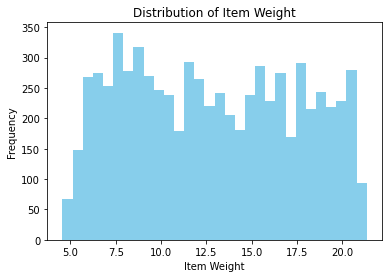

In [17]:
plt.hist(train['Item_Weight'], bins=30, color='skyblue')
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

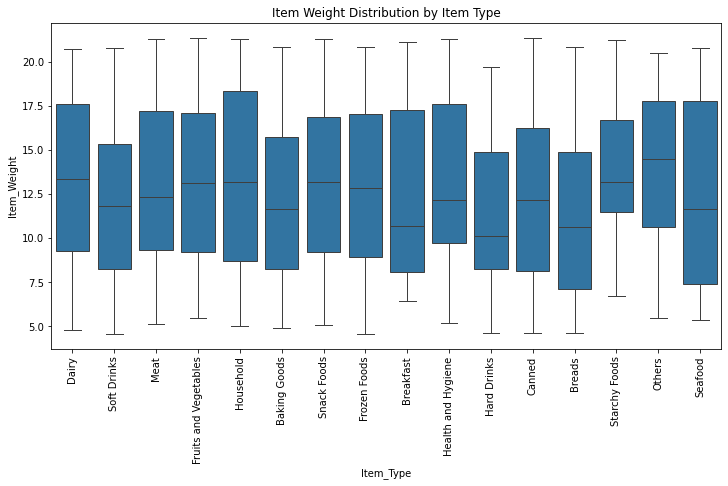

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Type', y='Item_Weight', data=train)
plt.xticks(rotation=90)
plt.title('Item Weight Distribution by Item Type')
plt.show()


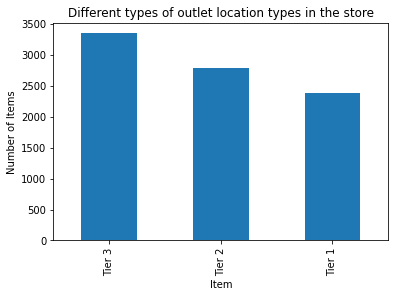

In [19]:
train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

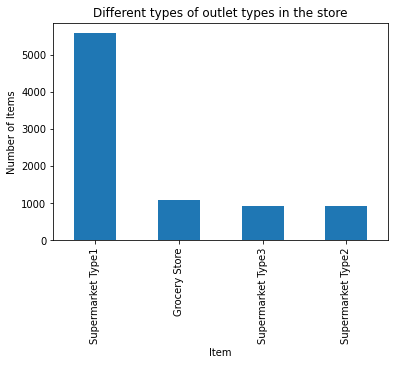

In [20]:
train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

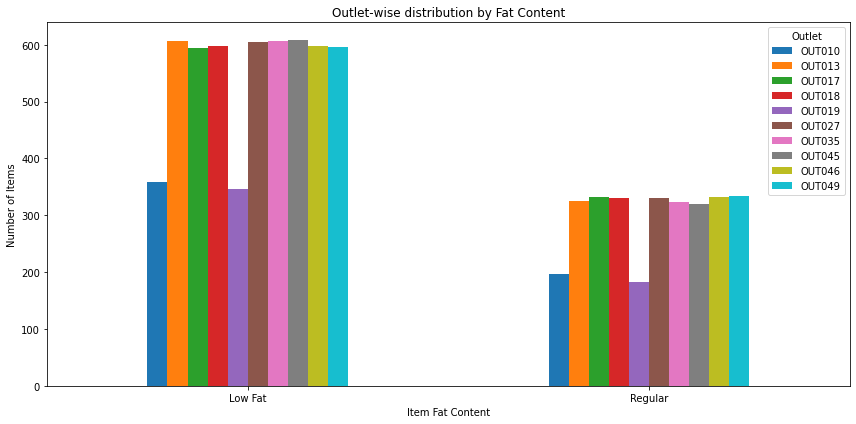

In [21]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'], train['Outlet_Identifier'])
Item_Fat_Content.plot(kind='bar', figsize=(12, 6))
plt.title('Outlet-wise distribution by Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Number of Items')
plt.xticks(rotation=0)
plt.legend(title='Outlet')
plt.tight_layout()
plt.show()


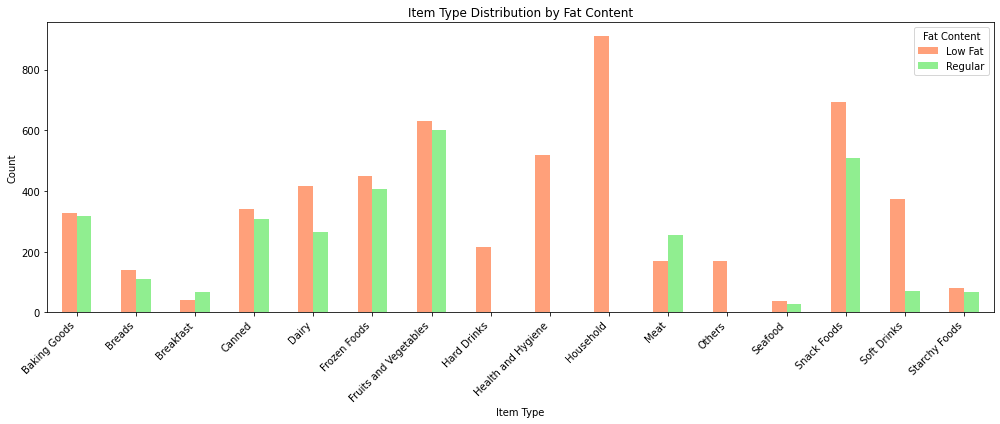

In [22]:
Item_Fat_Content = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])

Item_Fat_Content.plot(kind='bar', figsize=(14, 6), color=['#FFA07A', '#90EE90']) 
plt.title('Item Type Distribution by Fat Content')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fat Content')
plt.tight_layout()
plt.show()


In [23]:
data = pd.concat([train, test])

print(data.shape)

(14204, 12)


In [24]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [25]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [26]:
data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
item_avg_weight = data.groupby('Item_Identifier')['Item_Weight'].transform('mean')
data['Item_Weight'].fillna(item_avg_weight, inplace=True)


data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [28]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [29]:
data.loc[data['Outlet_Identifier'] == 'OUT010', 'Outlet_Size'] = 'Small'
data.loc[data['Outlet_Identifier'] == 'OUT045', 'Outlet_Size'] = 'Small'
data.loc[data['Outlet_Identifier'] == 'OUT017', 'Outlet_Size'] = 'Small'

In [30]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

## Older outlets (especially 28 years) tend to have higher average sales, while some mid-aged outlets (like 15 years) perform poorly. This suggests that store age influences performance, possibly due to factors like customer trust or operational maturity.

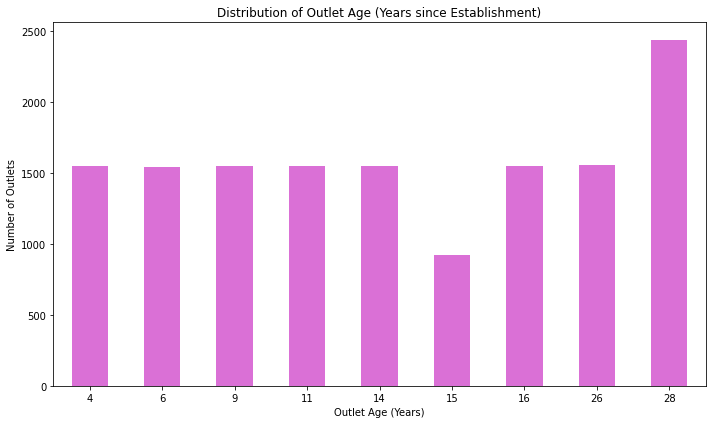

In [31]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']


plt.figure(figsize=(10, 6))
data['Outlet_Years'].value_counts().sort_index().plot(kind='bar', color='orchid')
plt.title('Distribution of Outlet Age (Years since Establishment)')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Most outlets show stable average sales regardless of age, except those aged 15 years, which perform notably worse. 

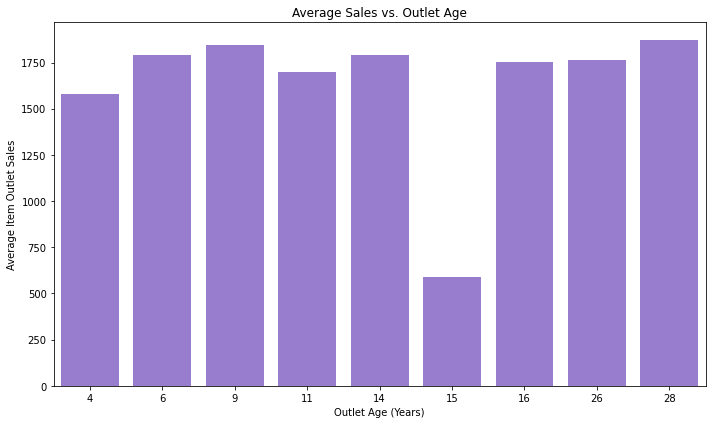

In [32]:
avg_sales_by_age = data.groupby('Outlet_Years')['Item_Outlet_Sales'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sales_by_age, x='Outlet_Years', y='Item_Outlet_Sales', color='mediumpurple')
plt.title('Average Sales vs. Outlet Age')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Average Item Outlet Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [33]:
data = data.drop(['Item_Identifier','Outlet_Establishment_Year'], axis = 1)
print(data.shape)

(14204, 11)


In [34]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Years'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
data.apply(LabelEncoder().fit_transform)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,299,0,1097,4,7567,9,1,0,1,2540,4
1,60,1,1436,14,632,3,1,2,2,422,0
2,394,0,1172,10,3897,9,1,0,1,1639,4
3,411,1,0,6,5626,0,2,2,0,670,5
4,279,0,0,9,848,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...
5676,315,1,718,13,3881,8,2,0,1,835,6
5677,190,1,11820,15,5069,3,1,2,2,835,0
5678,309,0,8009,8,3196,7,2,1,1,835,3
5679,372,1,0,3,6626,2,2,1,1,835,1


In [36]:
data = pd.get_dummies(data)

print(data.shape)

(14204, 43)


In [37]:
x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 42)
(14204,)


In [38]:
train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 43)
(5681, 43)


In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9942, 42)
(9942,)
(4262, 42)
(4262,)


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("predictions",y_pred)

mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


predictions [1131.82410006 2807.98126776 2535.59275207 ... 2777.32809583 2270.97766202
 1625.61859448]
RMSE : 1215.4111980856794
Variance score: 0.28


In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_train_log = np.log1p(np.ravel(y_train))

model = LinearRegression()
model.fit(x_train, y_train_log)

y_pred_log = model.predict(x_test)

y_pred = np.expm1(y_pred_log)

y_test = np.ravel(y_test)


mse = mean_squared_error(y_test, y_pred)
print("predictions",y_pred)
print('RMSE:', np.sqrt(mse))
print('Variance score (R²): %.2f' % r2_score(y_test, y_pred))


predictions [ 984.53883625 2360.10444219 2129.39579538 ... 2411.94419618 1686.7808438
 1154.52220772]
RMSE: 1246.9872798908889
Variance score (R²): 0.24


In [66]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1277.8417923876063


In [67]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
print(y_pred)

print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[1157.18418543 3374.55093382 2580.08298837 ... 3233.42385497 2368.64418286
 1099.09823041]
RMSE : 1205.1749453656307


In [68]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))


[ 991.882208 3265.788948 3070.057064 ... 2445.463426 3965.717856
  964.71091 ]
RMSE : 1272.9053938954487
Variance score: 0.21
Result : 0.890265813662402


In [69]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[ 739.038  6795.1548  958.752  ...  958.752  6385.022   958.752 ]
 RMSE :  1698.5792443617124


In [70]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1583.3814967927972


In [71]:
import numpy as np

x_train = np.asmatrix(x_train)
x_test = np.asmatrix(x_test)
y_train = np.asmatrix(y_train.T)
y_test = np.asmatrix(y_test.T)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9942, 42)
(4262, 42)
(1, 9942)
(1, 4262)


In [72]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.8.0


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import datetime

import tensorflow.keras.backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

input_dim = x_train.shape[1]


early_stopping = EarlyStopping(
    monitor='val_rmse',
    patience=5,
    restore_best_weights=True,
    mode='min'  #minimize RMSE
)
model = Sequential([
    Dense(20, activation='relu', input_shape=(input_dim,)),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mse',
              metrics=['mae', rmse])

model.summary()


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

y_train_array = np.array(y_train).reshape(-1)  
y_test_array = np.array(y_test).reshape(-1)   


print("x_train shape:", x_train.shape)
print("y_train shape after reshaping:", y_train_array.shape)

history = model.fit(
    x_train, y_train_array,
    epochs=600,
    batch_size=32,
    validation_data=(x_test, y_test_array),
    callbacks=[tensorboard_callback, early_stopping],
    verbose=1
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                860       
                                                                 
 dense_21 (Dense)            (None, 15)                315       
                                                                 
 dense_22 (Dense)            (None, 10)                160       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,346
Trainable params: 1,346
Non-trainable params: 0
_________________________________________________________________
x_train shape: (9942, 42)
y_train shape after reshaping: (9942,)
Epoch 1/600
311/311 [==============================] - 1s 1ms/step - loss: 4957644.0000 - mae: 1684.4290 - rmse: 2196.9

311/311 [==============================] - 0s 943us/step - loss: 1755104.2500 - mae: 974.5009 - rmse: 1301.5332 - val_loss: 1691761.0000 - val_mae: 946.4623 - val_rmse: 1277.2225
Epoch 39/600
311/311 [==============================] - 0s 924us/step - loss: 1754663.0000 - mae: 972.5464 - rmse: 1300.2362 - val_loss: 1690907.3750 - val_mae: 946.2101 - val_rmse: 1276.8900
Epoch 40/600
311/311 [==============================] - 0s 926us/step - loss: 1753441.2500 - mae: 971.6649 - rmse: 1302.9132 - val_loss: 1690076.7500 - val_mae: 946.2016 - val_rmse: 1276.6053
Epoch 41/600
311/311 [==============================] - 0s 935us/step - loss: 1752708.1250 - mae: 972.7531 - rmse: 1301.8088 - val_loss: 1689261.5000 - val_mae: 946.3514 - val_rmse: 1276.3517
Epoch 42/600
311/311 [==============================] - 0s 932us/step - loss: 1751561.6250 - mae: 972.7241 - rmse: 1300.4567 - val_loss: 1688352.5000 - val_mae: 945.7457 - val_rmse: 1275.9451
Epoch 43/600
311/311 [==============================]

Epoch 81/600
311/311 [==============================] - 0s 926us/step - loss: 1713167.6250 - mae: 960.6880 - rmse: 1284.9326 - val_loss: 1650816.6250 - val_mae: 934.9596 - val_rmse: 1261.3789
Epoch 82/600
311/311 [==============================] - 0s 943us/step - loss: 1711787.1250 - mae: 960.4366 - rmse: 1287.3134 - val_loss: 1649984.3750 - val_mae: 936.5682 - val_rmse: 1261.3517
Epoch 83/600
311/311 [==============================] - 0s 935us/step - loss: 1710696.0000 - mae: 961.6733 - rmse: 1284.7457 - val_loss: 1648589.1250 - val_mae: 934.1705 - val_rmse: 1260.4904
Epoch 84/600
311/311 [==============================] - 0s 919us/step - loss: 1709648.7500 - mae: 960.0339 - rmse: 1282.8937 - val_loss: 1647664.5000 - val_mae: 935.4459 - val_rmse: 1260.3782
Epoch 85/600
311/311 [==============================] - 0s 936us/step - loss: 1708345.7500 - mae: 961.6712 - rmse: 1285.9242 - val_loss: 1646258.3750 - val_mae: 932.4205 - val_rmse: 1259.4126
Epoch 86/600
311/311 [==================

311/311 [==============================] - 0s 1ms/step - loss: 1653844.2500 - mae: 943.6047 - rmse: 1265.4905 - val_loss: 1593454.7500 - val_mae: 918.4067 - val_rmse: 1239.0094
Epoch 124/600
311/311 [==============================] - 0s 993us/step - loss: 1652126.6250 - mae: 943.6154 - rmse: 1263.2915 - val_loss: 1591609.0000 - val_mae: 917.0615 - val_rmse: 1238.1598
Epoch 125/600
311/311 [==============================] - 0s 1ms/step - loss: 1650171.2500 - mae: 942.5339 - rmse: 1263.3645 - val_loss: 1590008.5000 - val_mae: 917.7412 - val_rmse: 1237.7123
Epoch 126/600
311/311 [==============================] - 0s 931us/step - loss: 1648264.6250 - mae: 941.0203 - rmse: 1262.6691 - val_loss: 1588532.7500 - val_mae: 918.7902 - val_rmse: 1237.3669
Epoch 127/600
311/311 [==============================] - 0s 924us/step - loss: 1646591.5000 - mae: 942.3688 - rmse: 1257.8517 - val_loss: 1586469.8750 - val_mae: 916.9902 - val_rmse: 1236.3702
Epoch 128/600
311/311 [==============================

311/311 [==============================] - 0s 920us/step - loss: 1571624.1250 - mae: 917.3395 - rmse: 1231.2256 - val_loss: 1515317.6250 - val_mae: 890.9792 - val_rmse: 1207.7114
Epoch 166/600
311/311 [==============================] - 0s 949us/step - loss: 1569959.0000 - mae: 914.3934 - rmse: 1229.4482 - val_loss: 1514352.7500 - val_mae: 893.5446 - val_rmse: 1207.8120
Epoch 167/600
311/311 [==============================] - 0s 955us/step - loss: 1568269.6250 - mae: 914.5295 - rmse: 1225.5760 - val_loss: 1512304.7500 - val_mae: 891.1570 - val_rmse: 1206.7228
Epoch 168/600
311/311 [==============================] - 0s 922us/step - loss: 1566412.2500 - mae: 914.8561 - rmse: 1230.7515 - val_loss: 1510380.6250 - val_mae: 887.0525 - val_rmse: 1205.4141
Epoch 169/600
311/311 [==============================] - 0s 930us/step - loss: 1564613.2500 - mae: 913.6967 - rmse: 1230.1298 - val_loss: 1508849.5000 - val_mae: 887.8275 - val_rmse: 1205.0221
Epoch 170/600
311/311 [==========================

311/311 [==============================] - 0s 932us/step - loss: 1522957.7500 - mae: 894.5020 - rmse: 1213.1693 - val_loss: 1473276.7500 - val_mae: 876.1731 - val_rmse: 1191.8298
Epoch 208/600
311/311 [==============================] - 0s 955us/step - loss: 1522767.1250 - mae: 895.5874 - rmse: 1211.7964 - val_loss: 1471576.3750 - val_mae: 871.3342 - val_rmse: 1190.4661
Epoch 209/600
311/311 [==============================] - 0s 923us/step - loss: 1522306.0000 - mae: 894.6951 - rmse: 1210.4219 - val_loss: 1471031.3750 - val_mae: 870.1063 - val_rmse: 1190.1064
Epoch 210/600
311/311 [==============================] - 0s 926us/step - loss: 1522093.6250 - mae: 894.1310 - rmse: 1209.2654 - val_loss: 1470769.7500 - val_mae: 871.4857 - val_rmse: 1190.2716
Epoch 211/600
311/311 [==============================] - 0s 933us/step - loss: 1521090.1250 - mae: 893.6462 - rmse: 1210.7712 - val_loss: 1470204.2500 - val_mae: 870.2213 - val_rmse: 1189.8923
Epoch 212/600
311/311 [==========================

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(x_test, verbose=0)


y_pred = y_pred.flatten()

y_true = y_test_array.flatten()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("TensorFlow Model RMSE:", rmse)
print("TensorFlow Model R² Score:", r2)


TensorFlow Model RMSE: 1210.8343339412017
TensorFlow Model R² Score: 0.28560236701662745


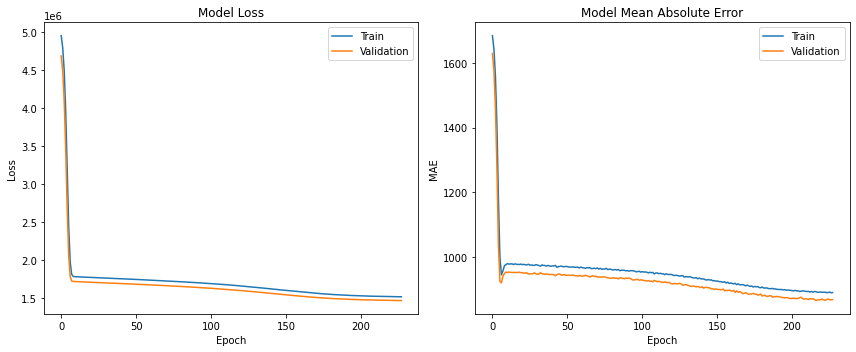

In [86]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# training & validation mean absolute error
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


For model comparison:
x_train shape: (9942, 42)
y_train shape: (9942,)
x_test shape: (4262, 42)
y_test shape: (4262,)
                             RMSE        R²
Linear Regression     1215.411198  0.280191
Decision Tree         1716.345873 -0.435424
Random Forest         1269.800976  0.214327
Gradient Boosting     1204.621859  0.292914
AdaBoost              1303.043310  0.172652
SVR                   1583.381497 -0.221636
Neural Network (TF2)  1210.834334  0.285602


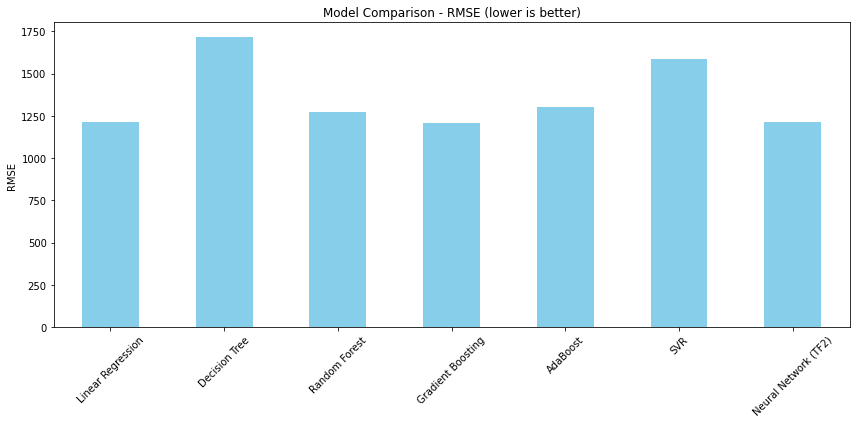

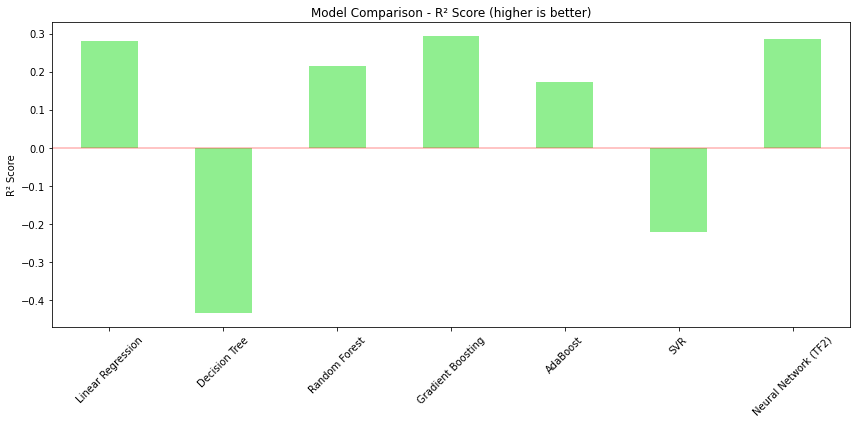

In [87]:
# Compare all models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(n_estimators=100),
    'SVR': SVR(),
    'Neural Network (TF2)': None  
}

results = {}

x_train_array = np.array(x_train)
y_train_array = np.array(y_train).reshape(-1)  
x_test_array = np.array(x_test)
y_test_array = np.array(y_test).reshape(-1)   

print("For model comparison:")
print("x_train shape:", x_train_array.shape)
print("y_train shape:", y_train_array.shape)
print("x_test shape:", x_test_array.shape)
print("y_test shape:", y_test_array.shape)


for name, model_instance in models.items():
    if model_instance is not None: 
        model_instance.fit(x_train_array, y_train_array)
        y_pred = model_instance.predict(x_test_array)
        rmse = np.sqrt(mean_squared_error(y_test_array, y_pred))
        r2 = r2_score(y_test_array, y_pred)
        results[name] = {'RMSE': rmse, 'R²': r2}


nn_pred = model.predict(x_test_array).flatten() 
nn_rmse = np.sqrt(mean_squared_error(y_test_array, nn_pred))
nn_r2 = r2_score(y_test_array, nn_pred)
results['Neural Network (TF2)'] = {'RMSE': nn_rmse, 'R²': nn_r2}


results_df = pd.DataFrame(results).T
print(results_df)

# comparison of RMSE
plt.figure(figsize=(12, 6))
results_df['RMSE'].plot(kind='bar', color='skyblue')
plt.title('Model Comparison - RMSE (lower is better)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# comparison of R squared
plt.figure(figsize=(12, 6))
results_df['R²'].plot(kind='bar', color='lightgreen')
plt.title('Model Comparison - R² Score (higher is better)')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

In [89]:
original_test = pd.read_csv("test_AbJTz2l.csv")

gb_model = GradientBoostingRegressor()
gb_model.fit(x_train_array, y_train_array)


submission_predictions = gb_model.predict(test.drop('Item_Outlet_Sales', axis=1))


submission = pd.DataFrame({
    'Item_Identifier': original_test['Item_Identifier'],
    'Outlet_Identifier': original_test['Outlet_Identifier'],
    'Item_Outlet_Sales': submission_predictions
})


submission.to_csv('submission_gradient_boosting.csv', index=False)
print("Gradient Boosting submission file saved successfully!")

Gradient Boosting submission file saved successfully!


C:\Users\Uma_pc\anaconda3\envs\tensor\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [90]:
original_test = pd.read_csv("test_AbJTz2l.csv")
original_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [79]:
test['Item_Outlet_Sales']

0       958.752
1       958.752
2       958.752
3       958.752
4       958.752
         ...   
5676    958.752
5677    958.752
5678    958.752
5679    958.752
5680    958.752
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [80]:
submission_predictions

array([1356.1562098 , 1225.982012  ,  606.59968472, ..., 1430.27114026,
       2597.91249674, 1180.13713294])